# Movie Ratings Analysis: Investigating Online Review Bias

## Project Overview
This data analysis project investigates potential bias in online movie ratings, specifically focusing on Fandango's rating system. The analysis compares movie ratings across multiple platforms including Fandango, Rotten Tomatoes, Metacritic, and IMDB to identify any systematic differences in rating patterns.

## Key Questions Addressed
- Do online movie review platforms show rating bias?
- How do Fandango's displayed ratings compare to actual user ratings?
- Is there a significant difference between critic and user ratings across platforms?
- How are poorly-rated movies scored across different platforms?

## Analysis Objectives
1. Evaluate potential bias in Fandango's rating system
2. Compare rating distributions across multiple platforms
3. Analyze the relationship between movie popularity and ratings
4. Investigate how poorly-rated movies are scored across platforms

## Data Sources
The analysis uses two primary datasets from FiveThirtyEight's GitHub repository:
1. `fandango_scrape.csv`: Contains movie ratings data from Fandango
2. `all_sites_scores.csv`: Includes aggregate ratings from multiple platforms

## References
- Original FiveThirtyEight Article: [Be Suspicious Of Online Movie Ratings, Especially Fandango's](http://fivethirtyeight.com/features/fandango-movies-ratings/)
- Data Source: [FiveThirtyEight GitHub Repository](https://github.com/fivethirtyeight/data)

## Environment Setup
Importing required libraries for data manipulation, analysis, and visualization.

In [1]:
# Core data manipulation and analysis libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Initial Exploration
Loading the two primary datasets:
1. `fandango_scrape.csv`: Fandango's movie ratings and displayed stars
2. `all_sites_scores.csv`: Aggregate ratings from multiple platforms

In [3]:
# Load Fandango ratings data
fandango = pd.read_csv("fandango_scrape.csv")

# Display basic information about the dataset
print("Fandango Dataset Overview:")
print("-" * 50)
print("\nFirst few rows:")
display(fandango.head())
print("\nDataset Info:")
display(fandango.info())
print("\nDescriptive Statistics:")
display(fandango.describe())

Fandango Dataset Overview:
--------------------------------------------------

First few rows:


,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


None


Descriptive Statistics:


,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [4]:
df=fandango.copy()

## Rating Distribution Analysis
Investigating the relationship between movie popularity (votes) and ratings on Fandango.
This helps us understand if there's any correlation between a movie's popularity and its rating.

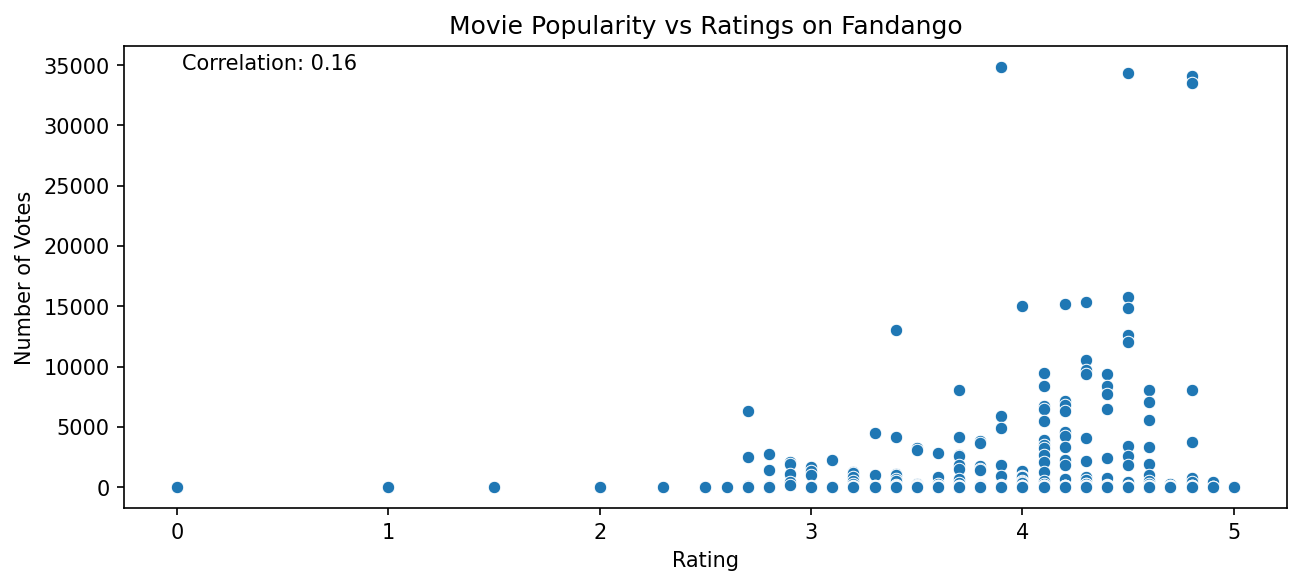


Correlation Matrix:


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [5]:
# Create figure for popularity vs rating scatter plot
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')
plt.title('Movie Popularity vs Ratings on Fandango')
plt.xlabel('Rating')
plt.ylabel('Number of Votes')

# Calculate and display correlation
correlation = fandango['RATING'].corr(fandango['VOTES'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.show()

# Display correlation matrix
print("\nCorrelation Matrix:")
display(fandango.corr(numeric_only=True))

## Temporal Analysis
Extracting and analyzing the year information from movie titles to understand rating patterns over time.

In [6]:
df.head(4)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538



Movie Count (Yearly):


YEAR
1964      1
2012      1
2014     23
2015    478
2016      1
Name: count, dtype: int64

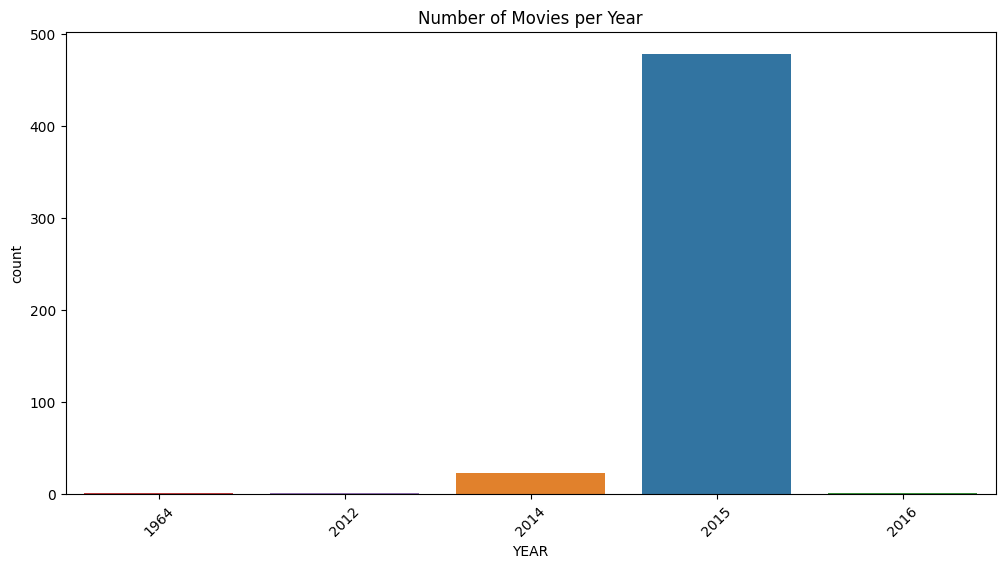


Top 10 Movies by Vote Count:


,FILM,VOTES,RATING,STARS
0,Fifty Shades of Grey (2015),34846,3.9,4.0
1,Jurassic World (2015),34390,4.5,4.5
2,American Sniper (2015),34085,4.8,5.0
3,Furious 7 (2015),33538,4.8,5.0
4,Inside Out (2015),15749,4.5,4.5
5,The Hobbit: The Battle of the Five Armies (2014),15337,4.3,4.5
6,Kingsman: The Secret Service (2015),15205,4.2,4.5
7,Minions (2015),14998,4.0,4.0
8,Avengers: Age of Ultron (2015),14846,4.5,5.0
9,Into the Woods (2014),13055,3.4,3.5


In [7]:
# Extract year from movie titles
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')', ''))
      
# Analyze movies per year
year_counts = fandango['YEAR'].value_counts().sort_index()
print(f'\nMovie Count (Yearly):')
display(year_counts)

# Visualize distribution of movies per year
plt.figure(figsize=(12, 6))
sns.countplot(data=fandango, x='YEAR', order=year_counts.index,hue='YEAR')
plt.title('Number of Movies per Year')
plt.xticks(rotation=45)
plt.show()

# Display top movies by vote count
print("\nTop 10 Movies by Vote Count:")
display(fandango.nlargest(10, 'VOTES')[['FILM', 'VOTES', 'RATING', 'STARS']])